# KUIS 2

## Identity

NIM: 2241727028

Nama: Refido Berliano Hartawan

Kelas: TI-4J

## Import Library

In [26]:
# mathematical
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
# classification, training, accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split


## Data Preparation

In [27]:
# Load data
df = pd.read_csv('dataset_quiz (1).csv')
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [28]:
# Replace NAN, TIDAK, YA, etc
df = df.replace('TIDAK', 0)
df = df.replace('ADA', 0)
df = df.replace('Hak Cipta', 1)
df = df.replace('TIDAK ADA', 0)
df = df.replace('YA', 1)
df = df.replace('DRAFT', 3)
df = df.replace('SUDAH', 3)
df = df.replace('REGULER', 1)
df = df.replace('KEMITRAAN', 1)
df = df.replace('Publikasi Media Massa', 1)
df = df.replace('Artikel Ilmiah', 2)
df = df.replace('Modul Ajar', 3)
df = df.replace('Terpublikasi', 1)
df = df.replace('Draft', 2)
df = df.replace(np.nan, 0)
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,2019,1,0,0,0,0,0,0
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,2019,1,0,0,0,0,0,0
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,2019,1,0,0,0,0,0,0
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,2019,1,0,0,0,0,0,0
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,2019,1,0,0,0,0,0,0


# Visualisasi data

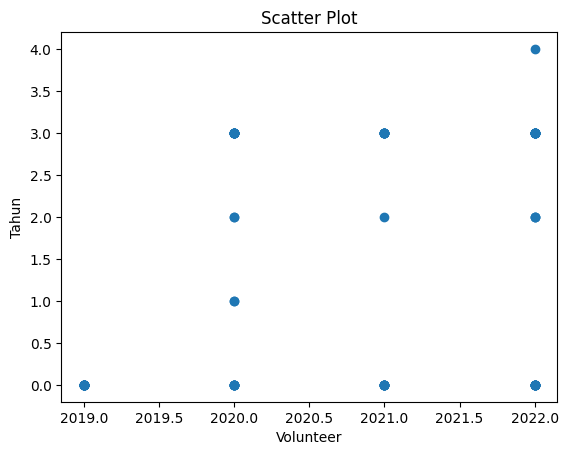

In [29]:
# Scatter plot with tahun against jml_vltr_terlibat 
plt.scatter(df['tahun'], df['jml_vltr_terlibat'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Volunteer')
plt.ylabel('Tahun')
 
plt.show()

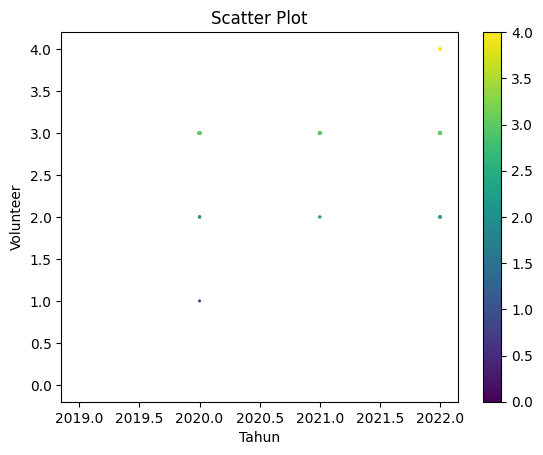

In [30]:
# Scatter plot with day against tip
plt.scatter(df['tahun'], df['jml_vltr_terlibat'], c=df['jml_vltr_terlibat'],
            s=df['jml_vltr_terlibat'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Tahun')
plt.ylabel('Volunteer')
 
plt.colorbar()
 
plt.show()

Text(0, 0.5, 'Tahun')

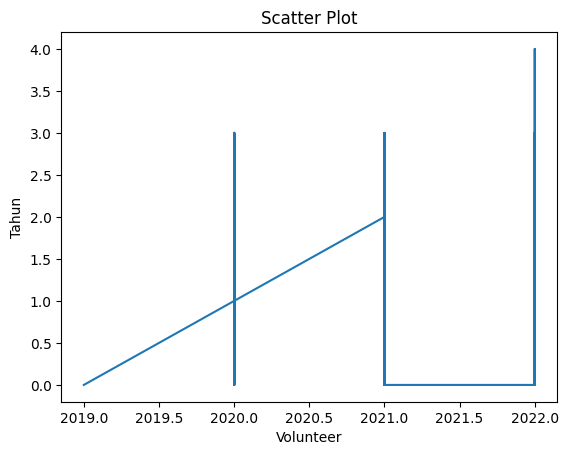

In [31]:
# Scatter plot with day against tip
plt.plot(df['tahun'], df['jml_vltr_terlibat'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Volunteer')
plt.ylabel('Tahun')

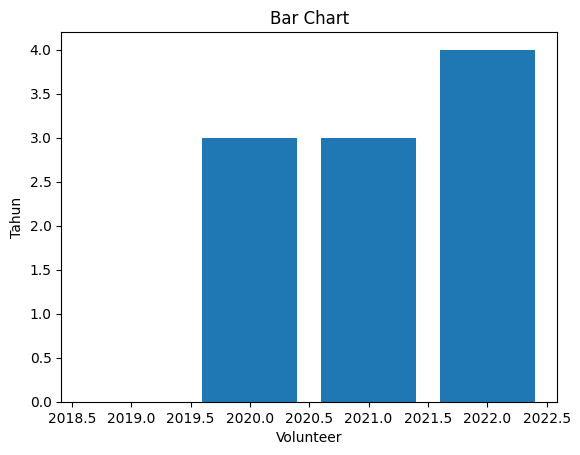

In [32]:
# Bar chart with day against tip
plt.bar(df['tahun'], df['jml_vltr_terlibat'] )
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Volunteer')
plt.ylabel('Tahun')
 
# Adding the legends
plt.show()

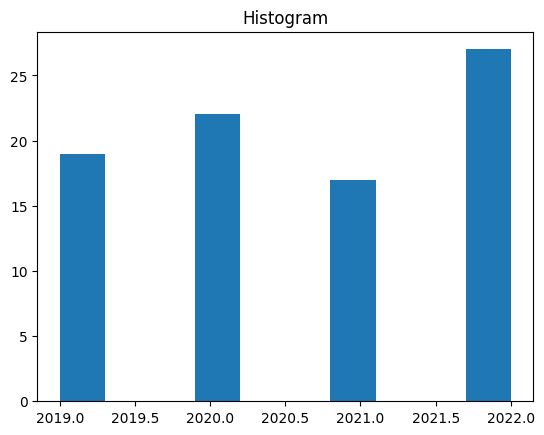

In [33]:
# histogram of total_bills
plt.hist(df['tahun'])
 
plt.title("Histogram")
 
# Adding the legends
plt.show()

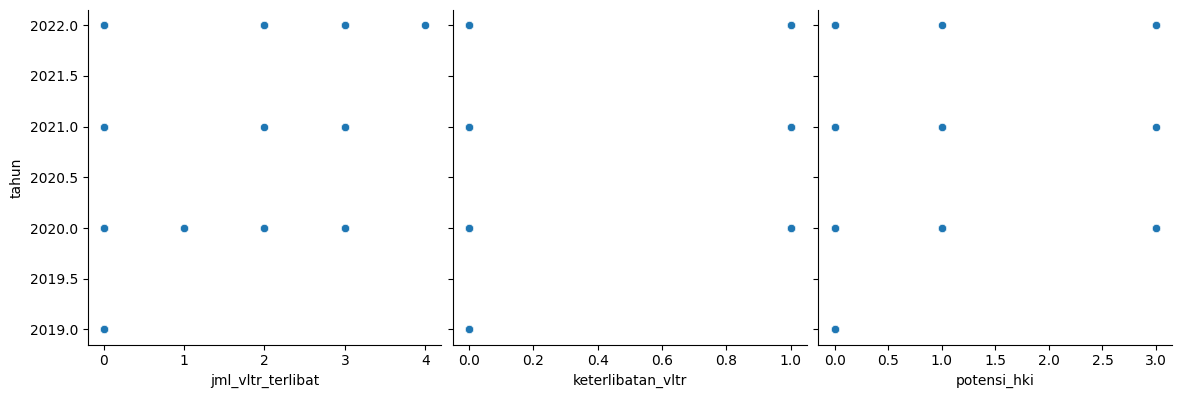

In [34]:
# operasi visualisasi
sns.pairplot(df, x_vars=['jml_vltr_terlibat','keterlibatan_vltr','potensi_hki'], 
             y_vars='tahun', height=4, aspect=1, kind='scatter')
plt.show()

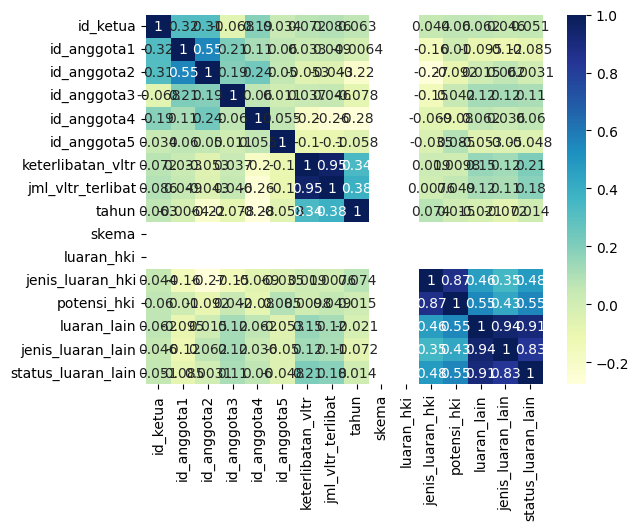

In [35]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Data Training

In [36]:
#Separating the independent varaibles
x = df.drop('tahun',axis=1)
x.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,1,0,0,0,0,0,0
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,1,0,0,0,0,0,0
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,1,0,0,0,0,0,0
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,1,0,0,0,0,0,0
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,1,0,0,0,0,0,0


In [37]:
#Separating the tahun varaible
y = df[['tahun']]
y.head()

,tahun
0,2019
1,2019
2,2019
3,2019
4,2019


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 4)

In [39]:
y_train = np.array(y_train['tahun'])
y_test1 = np.array(y_test['tahun'])

# Classification

## Training Decision Tree

In [40]:
#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

In [59]:
#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
train_score = tree.score(x_train,y_train)
print("Training accuracy: ", train_score)
acc_score = accuracy_score(y_test, pred_tree)
print('Testing accuracy: ',acc_score)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  0.9830508474576272
Testing accuracy:  0.2692307692307692


## Hyper parameter Optimization

In [42]:
#Setting values for the parameters
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [43]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


## Descision Tree with best Hyper parameters

In [44]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, max_features=10)
tree1.fit(x_train,y_train)
pred_tree1 = tree1.predict(x_test)

In [45]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",tree1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_tree1)
print('Testing accuracy: ',acc_score)

Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.8135593220338984
Testing accuracy:  0.38461538461538464


## Training RandomForest

In [46]:
#Fitting a RandomForest with default hyper parameters
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [47]:
#Checking different metrics for decision random forest model with default hyper parameters
print('Checking different metrics for decision random forest model with default hyper parameters:\n')
print("Training accuracy: ",rf.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_rf)
print('Testing accuracy: ',acc_score)

Checking different metrics for decision random forest model with default hyper parameters:

Training accuracy:  0.9830508474576272
Testing accuracy:  0.3076923076923077


## Hyper parameter Optimization

In [48]:
#Setting values for the parameters
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [49]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridrf.best_params_)

The best hyper parameters are: 
 {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}


## RandomForest with best Hyper parameters

In [50]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
rf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1,min_samples_split=5, max_features=2)
rf2.fit(x_train,y_train)
pred_tree1 = rf2.predict(x_test)

In [51]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",rf2.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_tree1)
print('Testing accuracy: ',acc_score)

Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.7796610169491526
Testing accuracy:  0.38461538461538464


# Evaluation Matrix

## Confusion Matrix

## ROC